# 프로그램의 목적
* 자연어를 분류 문제 모델에 적용하기 위해서 자연어를 전처리한다.
* 전처리시 Feature를 설정할 때 TF-IDF 기법을 활용한다.

## TF-IDF 기반 스팸분석
* 사용 모델: 싸이킷런(sklearn) - LogisticRegression
* Feature: 형태소에서 추출된 단어별 빈도
* 분석 목표(예측 값): 스펨 메일 판별
* 데이터 출처: https://https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [57]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### SMSSpamCollection 을 먼저 살펴 본다.

In [58]:
spam_header = 'spam\t'
no_spam_header = 'ham\t'
# Feature를 추출하기 위한 메일 제목 내용
documents = []
# 각 메일제목 내용별 스팸메일 유무를 저장하는 Label 정보
labels = []

* 원본 데이터에서 라벨은 labes 리스트에, 메일 제목 자연어 데이터는 documents 리스트에 저장

In [59]:
with open('SMSSpamCollection','r',encoding='UTF8') as file_handle:
    for line in file_handle:
        # 각 줄에서 레이블 부분만 떼어내고 나머지를 documents에 넣는다.
        if line.startswith(spam_header):
            labels.append(1) # 스펨메일의 라벨을 1로 처리
            documents.append(line[len(spam_header):])
        elif line.startswith(no_spam_header):
            labels.append(0) # 정상메일 라벨을 0로 처리
            documents.append(line[len(no_spam_header):])

In [60]:
documents[:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
 'Ok lar... Joking wif u oni...\n',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'U dun say so early hor... U c already then say...\n',
 "Nah I don't think he goes to usf, he lives around here though\n"]

In [61]:
labels[:5]

[0, 0, 1, 0, 0]

## TF-IDF
* Term Frequency x Inverse Document Frequency
* 문서는 단어로 주어져 있으며 각단어가 문서상의 어떠한 연관성이 있는지 수치로 표현

### TF
* 가설: 중요한 단어는 문서상에 많이 출현한다.
* 단어가 문서상에 얼마나 출현했는지 수치로 표현: (문서상에 발견된 단어)/(전체 문서상의 단어)

"a new car, used car, car review"
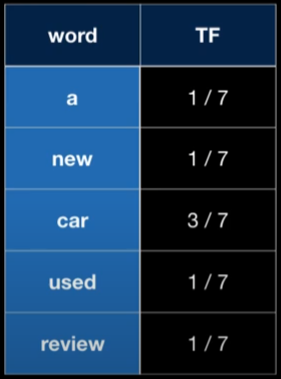

### TF 스코어의 한계

"a friend in need is a friend indeed"
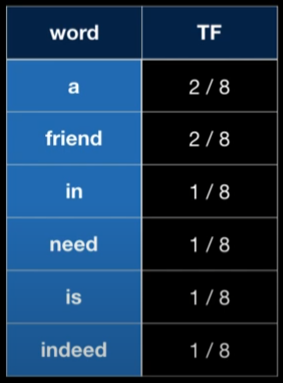

### 위 문서에서 가장 중요한 단어는?

* 가장 중요한 단어: friend
* 그렇지만 a도 TF 스코어가 높게 나온다.

## IDF (Inverse Document Frequency)
* 공식 Log(Total # of Docs / # of Docs with the term in it) 
 - Log(총문장의 갯수/해당 단어가 포함된 문장의 갯수)
* 해석: 자주 등장하는 단어에 패널티를 부과(a, is, of, that 등)

A: "a new car, used car, car review"  
B: "a friend in need is a friend indeed"  
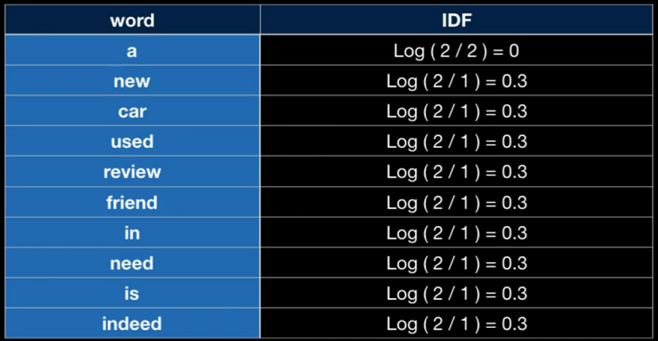

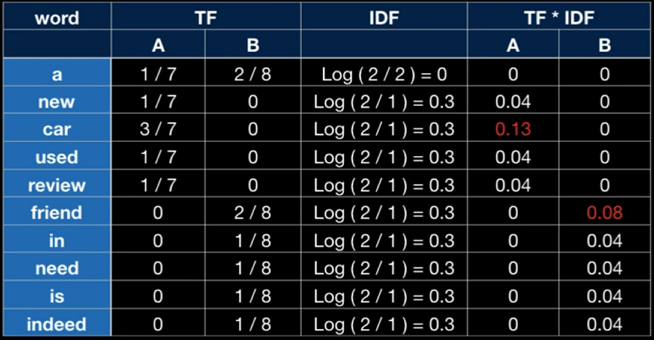

In [62]:
vectorizer = CountVectorizer()  # 단어 횟수 피처를 만드는 클래스

In [63]:
term_counts = vectorizer.fit_transform(documents)  # 문서에서 메일 제목별 전체 단어별 단어 횟수를 센다.

In [64]:
vocabulary = vectorizer.get_feature_names_out()
vocabulary

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [65]:
vocabulary[1000:1100]

array(['ahhhh', 'ahmad', 'ahold', 'aid', 'aids', 'aig', 'aight', 'ain',
       'aint', 'air', 'air1', 'airport', 'airtel', 'aiya', 'aiyah',
       'aiyar', 'aiyo', 'ajith', 'ak', 'aka', 'akon', 'al', 'alaikkum',
       'alaipayuthe', 'albi', 'album', 'alcohol', 'aldrine', 'alert',
       'alertfrom', 'alerts', 'aletter', 'alex', 'alfie', 'algarve',
       'algebra', 'algorithms', 'ali', 'alian', 'alibi', 'alive', 'all',
       'allah', 'allalo', 'allday', 'alle', 'allo', 'allow', 'allowed',
       'allows', 'almost', 'alone', 'along', 'alot', 'already', 'alright',
       'alrite', 'also', 'alter', 'alternative', 'although', 'alto18',
       'aluable', 'alwa', 'always', 'alwys', 'am', 'amanda', 'amazing',
       'ambitious', 'ambrith', 'american', 'ami', 'amigos', 'amk', 'amla',
       'amma', 'ammae', 'ammo', 'amnow', 'among', 'amongst', 'amore',
       'amount', 'amp', 'amplikater', 'amrca', 'amrita', 'ams', 'amt',
       'amused', 'amy', 'an', 'ana', 'anal', 'analysis', 'anand', 'and

In [66]:
len(vocabulary)

8713

In [67]:
tf_transformer = TfidfTransformer(use_idf=False).fit(term_counts) # TF-IDF를 사용하지 않고 단어 빈도 TF만 사용
# tf_transformer = TfidfTransformer(use_idf=True).fit(term_counts)
# tf_transformer = TfidfTransformer().fit(term_counts)
features = tf_transformer.transform(term_counts)

In [68]:
type(features)

scipy.sparse._csr.csr_matrix

In [69]:
features

<5574x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

#### 희소행렬

* 0을 다수 포함하는 배열에서 배열의 공간을 최적화하기 위해 저장하는 방식

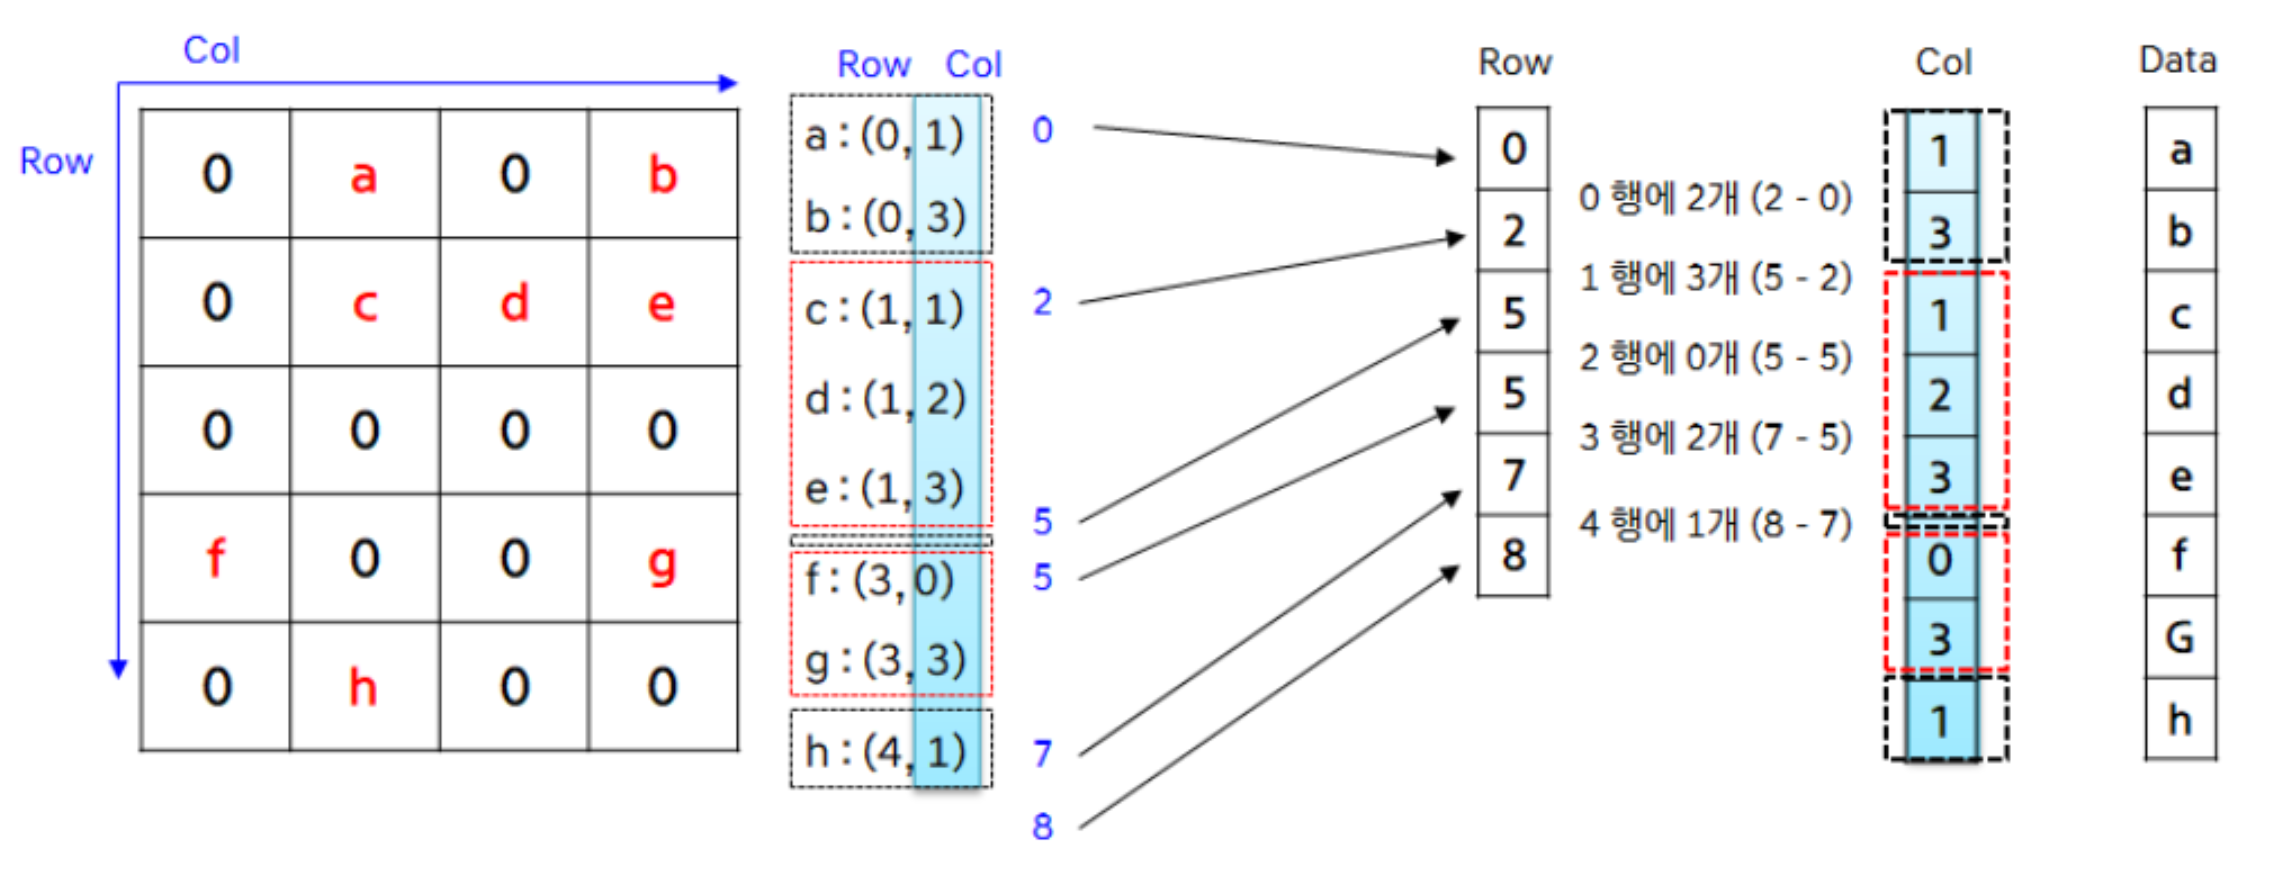

* 실제 데이터가 있는 데이터를 중심으로 Row, Col, Data 1차원 배열로 압축하여 저장

## 예제를 통해 변환과정 이해

* 메일 제목

* 단어별 워드 카운트 

|                                          | any | are | best | in | is | latest | market | offer | on | project | the | there | this | update | updates |
|------------------------------------------|-----|-----|------|----|----|--------|--------|-------|----|---------|-----|-------|------|--------|---------|
| The best offer in the market             | 0   | 0   | 1    | 1  | 0  | 0      | 1      | 1     | 0  | 0       | 2   | 0     | 0    | 0      | 0       |
| This is the latest update on the project | 0   | 0   | 0    | 0  | 1  | 1      | 0      | 0     | 1  | 1       | 2   | 0     | 1    | 1      | 0       |
| Are there any updates on the project     | 1   | 1   | 0    | 0  | 0  | 0      | 0      | 0     | 1  | 1       | 1   | 1     | 0    | 0      | 1       |
|
   |



* TF-IDF 테이블  
  TF-IDF로 변경하여 보다 중요한 단어에 가중치를 부여한다.

* 희소행렬 변환  
  * 희소행렬은 컴퓨터가 메모리를 효율적으로 저장할 수 있는 구조로 변환  
  * 정확히 알 필요는 없으나 위 정보를 포함하는 정도로 이해하자

In [70]:
# 처리된 파일을 저장합니다. 앞으로의 예제에서 사용될 예정입니다.
# pickle: 파이썬의 바이너리 데이터를 저장하는 용도로 사용
# wb: 바이너리로 저장
with open('processed.pickle', 'wb') as file_handle:
    pickle.dump((vocabulary, features, labels), file_handle)

In [71]:
!dir *.pickle

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 64E7-45B0

 D:\hjnam\project\DataScience\05_AI\05_자연어처리\01_텍스트마이닝 디렉터리

2024-08-20  오전 10:14         1,003,814 processed.pickle
               1개 파일           1,003,814 바이트
               0개 디렉터리  1,992,588,185,600 바이트 남음


# 전처리의 의미

* TF-IDF를 통하여 자연어 분석을 할 수 있는 BOW 모델을 생성
* BOW(Bag of Words) 문서별 각 단어가 몇 번 등장하는지를 빈도로 표현하여 자연어 분석에 활용